## Display Image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

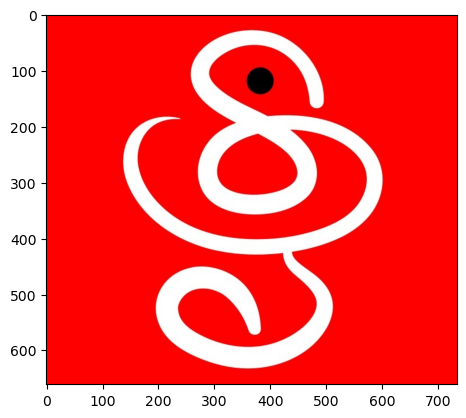

In [9]:
img = cv2.imread('Tamil.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

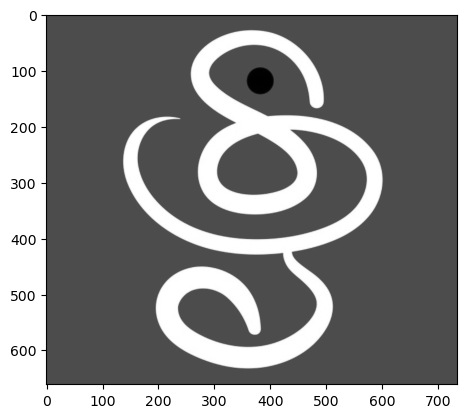

In [7]:

greysc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(greysc,cmap='gray')

## segment an image:

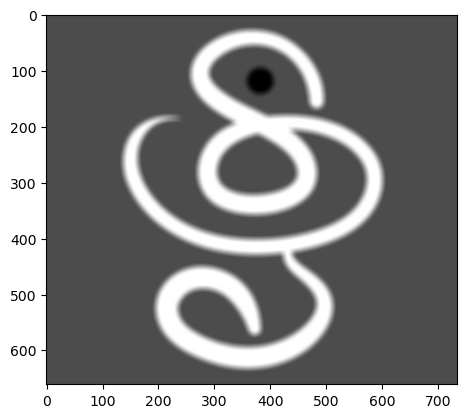

In [18]:
Gaussian = cv2.GaussianBlur(greysc, (13, 13), 10) 
plt.imshow(Gaussian,cmap='gray')

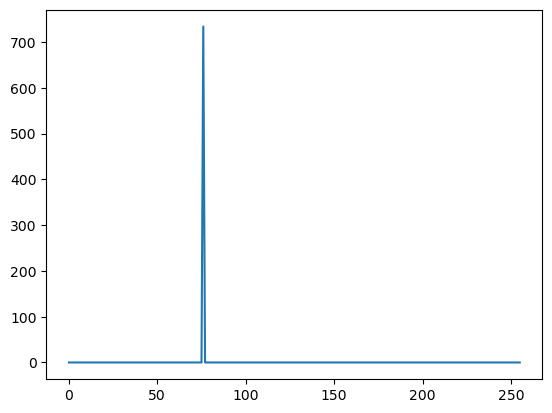

In [103]:
histr = cv2.calcHist(greysc,[0],None,[256],[0,256])
plt.plot(histr)

### 1. Adaptive thresholding:

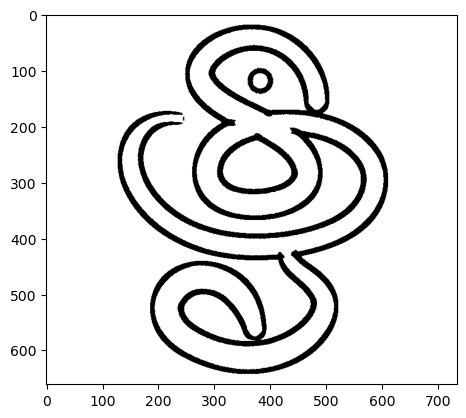

In [25]:
th2 = cv2.adaptiveThreshold(Gaussian,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(th2,cmap='gray')

### 2. Watershed:

In [46]:
ret, thresh = cv2.threshold(Gaussian,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [47]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

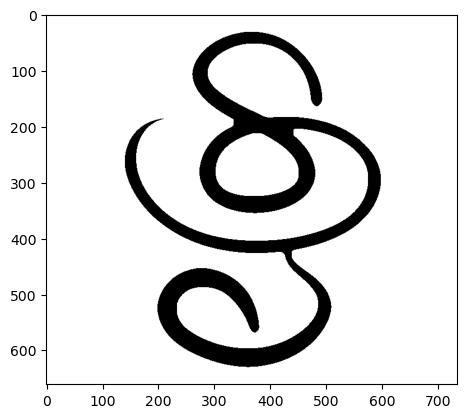

In [51]:
plt.imshow(sure_bg,cmap='gray')

In [35]:
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [36]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

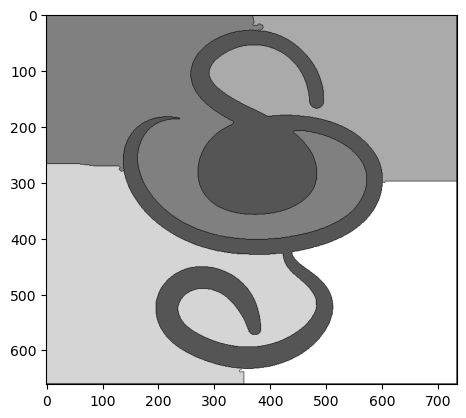

In [71]:
plt.imshow(markers,cmap='gray')

##  morphological transform:

In [86]:
cirkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
reckernel = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
crosskernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

In [87]:
img_erosion = cv2.erode(greysc, cirkernel, iterations=1,) 
img_dilation = cv2.dilate(greysc, cirkernel, iterations=1)

### 1.Circular structuring element:

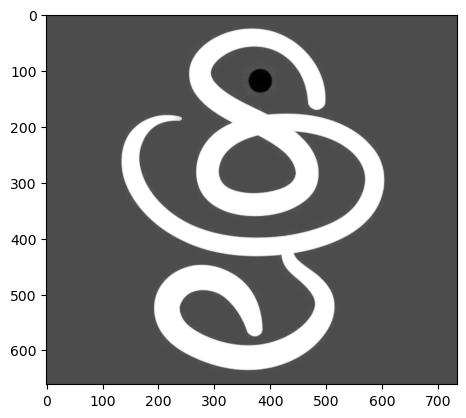

In [88]:
plt.imshow(img_dilation,cmap='gray')

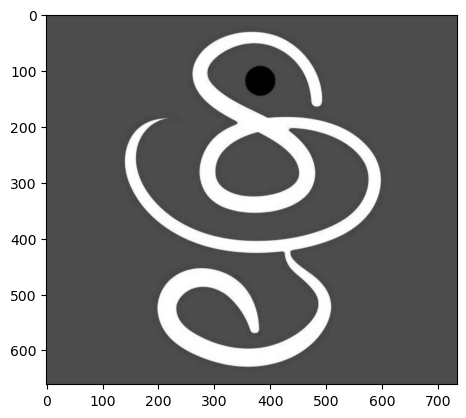

In [89]:
plt.imshow(img_erosion,cmap='gray')

### 2.Square structuring element:

In [90]:
img_erosion = cv2.erode(greysc, reckernel, iterations=1,) 
img_dilation = cv2.dilate(greysc, reckernel, iterations=1)

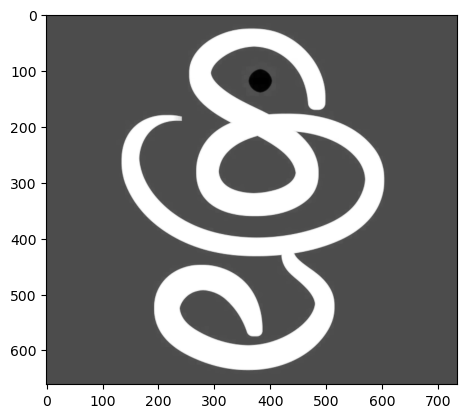

In [91]:
plt.imshow(img_dilation,cmap='gray')

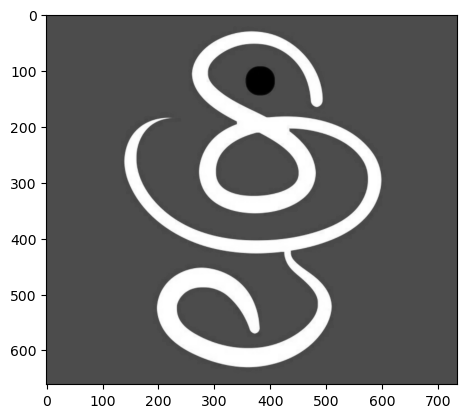

In [85]:
plt.imshow(img_erosion,cmap='gray')

### 3.cross shaped structuring element:

In [97]:
opening = cv2.morphologyEx(greysc, cv2.MORPH_OPEN, crosskernel)
closing = cv2.morphologyEx(greysc, cv2.MORPH_CLOSE, crosskernel)

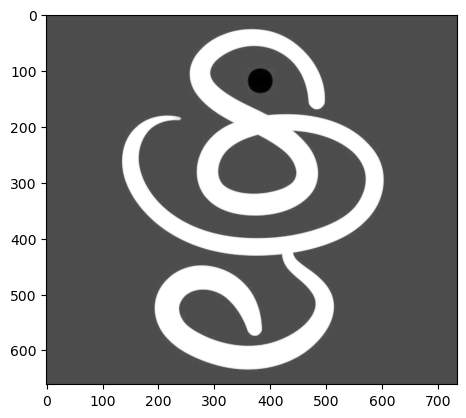

In [98]:
plt.imshow(img_dilation,cmap='gray')

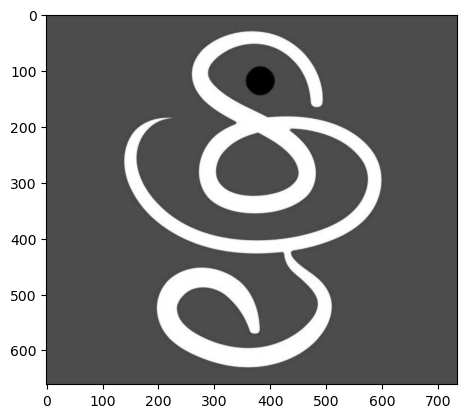

In [99]:
plt.imshow(img_erosion,cmap='gray')

## Mask of Veins:

In [100]:
mask = ~sure_bg

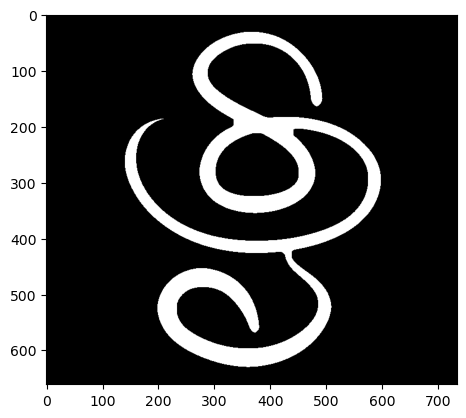

In [101]:
plt.imshow(mask,cmap='gray')